## Data Extraction and Prerocessing


In [1]:
#Genel komutlar

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
#RMSE ile tahmin hatalarımı belirlemek için sqrt çağırdım.(evaluate forecast)
from math import sqrt
from sklearn.metrics import mean_squared_error
#Verisetini ayıklamak için çağırdım
from numpy import split
from numpy import array



path = "../input/solar-radiation-dataset/2017_2019.csv"
df = pd.read_csv(path)


print(df)

        Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  \
0       2017      1    1     0       0         -0.6             0   
1       2017      1    1     0      15         -0.6             0   
2       2017      1    1     0      30         -0.6             0   
3       2017      1    1     0      45         -0.6             0   
4       2017      1    1     1       0         -0.7             0   
...      ...    ...  ...   ...     ...          ...           ...   
105115  2019     12   31    22      45          4.0             0   
105116  2019     12   31    23       0          3.9             0   
105117  2019     12   31    23      15          3.9             0   
105118  2019     12   31    23      30          3.9             0   
105119  2019     12   31    23      45          3.9             0   

        Clearsky DNI  Clearsky GHI  Dew Point  DHI  DNI  GHI  \
0                  0             0       -2.6    0    0    0   
1                  0             0       -2

Sütun bilgisi almak üzere info komutu kullanılır, eksik ve boş sütunlar düzenlenir.
Veriseti işlenecek hale getirilir.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                105120 non-null  int64  
 1   Month               105120 non-null  int64  
 2   Day                 105120 non-null  int64  
 3   Hour                105120 non-null  int64  
 4   Minute              105120 non-null  int64  
 5   Temperature         105120 non-null  float64
 6   Clearsky DHI        105120 non-null  int64  
 7   Clearsky DNI        105120 non-null  int64  
 8   Clearsky GHI        105120 non-null  int64  
 9   Dew Point           105120 non-null  float64
 10  DHI                 105120 non-null  int64  
 11  DNI                 105120 non-null  int64  
 12  GHI                 105120 non-null  int64  
 13  Relative Humidity   105120 non-null  float64
 14  Solar Zenith Angle  105120 non-null  float64
 15  Surface Albedo      105120 non-nul



*   Ay ,yıl ve saat değerleri işlenebilecek formatta.Bu hazırlama işlemini kolaylaştıracaktır.
*  Verisetinde tek yapılması gereken Değersiz sütunu çıkarmak olacaktır.





In [3]:
df.tail(5)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Unnamed: 18
105115,2019,12,31,22,45,4.0,0,0,0,4.0,0,0,0,100.0,163.63,0.12,999,2.0,NaN
105116,2019,12,31,23,0,3.9,0,0,0,3.9,0,0,0,100.0,162.09,0.12,999,2.0,NaN
105117,2019,12,31,23,15,3.9,0,0,0,3.9,0,0,0,100.0,160.16,0.12,999,2.0,NaN
105118,2019,12,31,23,30,3.9,0,0,0,3.9,0,0,0,100.0,157.93,0.12,999,2.0,NaN
105119,2019,12,31,23,45,3.9,0,0,0,3.9,0,0,0,100.0,155.48,0.12,999,2.0,NaN


In [4]:
df=df.drop(['Unnamed: 18'], axis = 1) 

Date -Time Ayarlama 

In [5]:
cols = ["Year","Month","Day","Hour","Minute"]
df["date_time"] = df[cols].apply(lambda row: "-".join(row.values.astype(str)), axis=1)


In [6]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d-%H-%M')

Diğerlerini silme

In [7]:
df=df.drop(["Year","Month","Day","Hour","Minute","Clearsky DHI","Clearsky DNI","Clearsky GHI","DHI" ,"DNI" ],axis = 1)

Zamanı İndex haline getirmek

In [8]:
#df.reset_index() # Sıfırlamak içn
#df.assign(State=df.index.get_level_values('State'))#İndexi column yapmak için
df=df.set_index('date_time') #Columnu index yapmak için

In [9]:
df.index.max()

Timestamp('2019-12-31 23:45:00')

Visualisation

In [10]:
import matplotlib.pyplot as plt

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

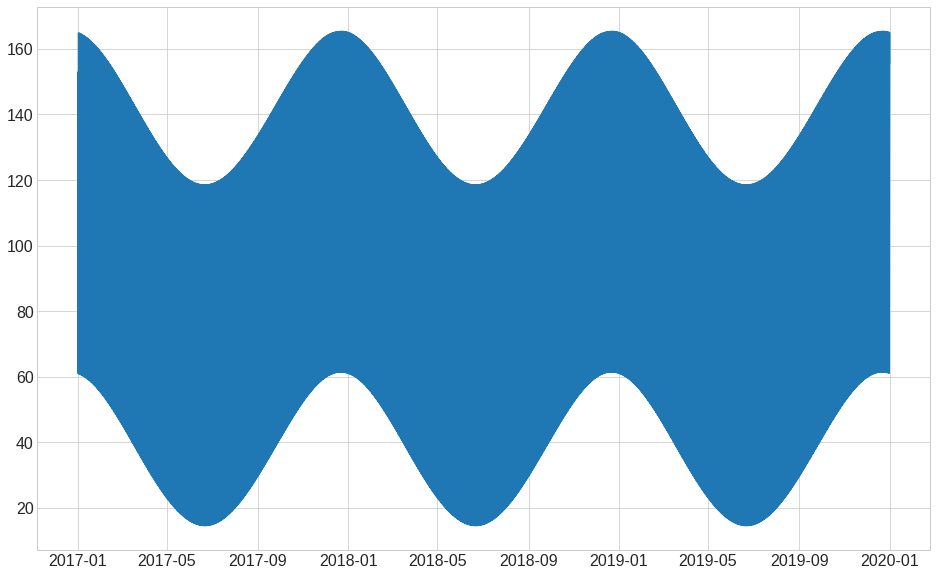

In [11]:
plt.plot(df["Solar Zenith Angle"])

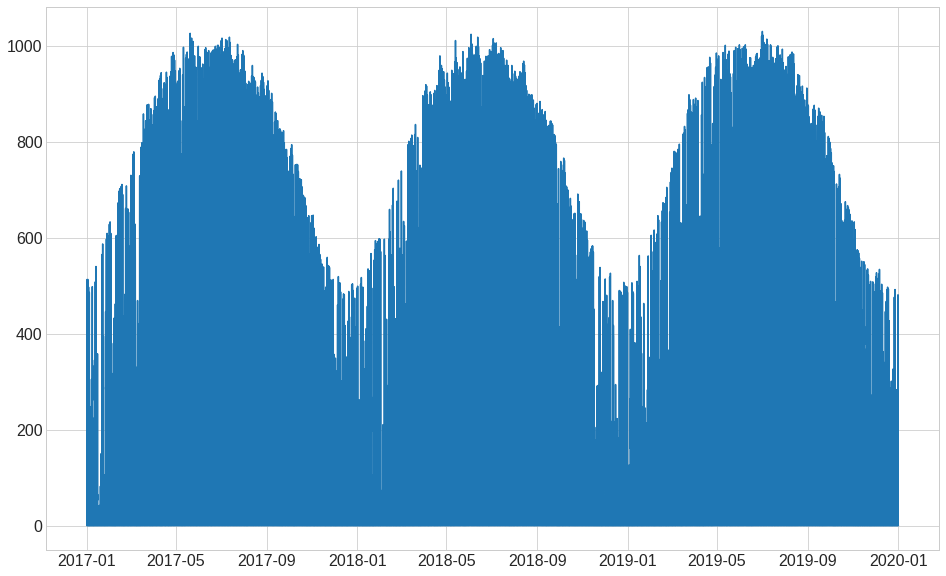

In [12]:
plt.plot(df["GHI"])

Haftalık/Aylık/ Yıllık Kesitler

<AxesSubplot:xlabel='date_time'>

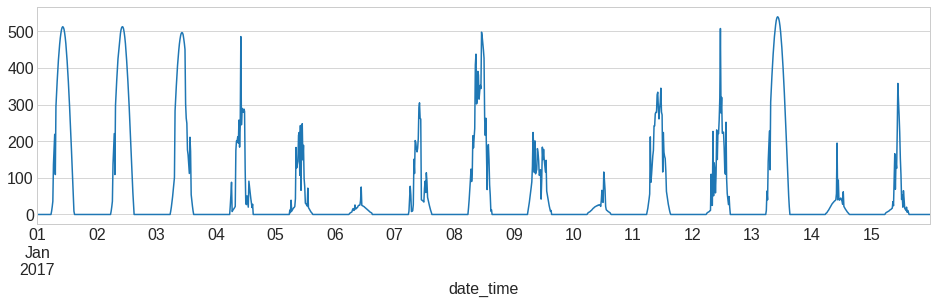

In [13]:
df['GHI']["2017-01-01":"2017-01-15"].plot(figsize=(16,4))

Aylık Ortalama değerler

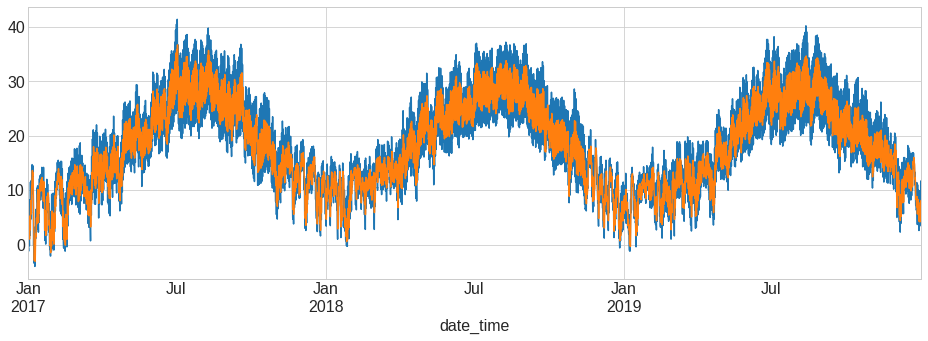

In [14]:
df["Temperature"].plot(figsize=(16,5))
df.rolling(window=60).mean()["Temperature"].plot();

In [15]:
from matplotlib import dates

#VeriSetini Hazırlamak











1.  Input ve Output değerlerini belirlemek
2.  Train / Test setini  ayırmak
1.  Verisetini Ölçeklendirmek
2.   


 





Kullanılacak algoritmalarda en iyi parametreleri bulmak için optuma modülü yüklendi

In [16]:
!pip install --quiet optuna

In [17]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import re
import optuna 
import xgboost as xgb

from sklearn.metrics import r2_score  


1.Output değeri olarak GHI seçiliyor. Global Hourly Irradiance ,Direct ve Diffuse Radiance ın toplanımda oluşturulan radyasyon değeridir.

In [18]:
y = df["GHI"].copy()
X = df.drop("GHI",axis=1).copy()

2.Ölçeklendirme ile tüm değerlerin birbirleriyle etkileşimini dengelemiş oluruz.

In [19]:
scaler = StandardScaler()

X=scaler.fit_transform(X)

In [20]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,-2.221227,-2.743177,0.916938,1.704156,-0.682285,1.866834,-0.738457
1,-2.221227,-2.743177,0.916938,1.631407,-0.682285,1.866834,-0.738457
2,-2.221227,-2.743177,0.916938,1.556233,-0.682285,1.866834,-0.738457
3,-2.221227,-2.763620,0.881061,1.479981,-0.682285,1.866834,-0.805162
4,-2.233112,-2.763620,0.911198,1.402112,-0.682285,1.866834,-0.805162
...,...,...,...,...,...,...,...
105115,-1.674517,-1.393972,1.572774,1.992728,-0.682285,1.120208,-0.538339
105116,-1.686402,-1.414414,1.572774,1.951234,-0.682285,1.120208,-0.538339
105117,-1.686402,-1.414414,1.572774,1.899232,-0.682285,1.120208,-0.538339
105118,-1.686402,-1.414414,1.572774,1.839146,-0.682285,1.120208,-0.538339


Train Test Split
Verisetini ayrımanın en iyi yolu test train ve validation olarak 3 sete 
ayırmaktır.
*   Train setinde model eğitilir .
*   Validation sette modeller karşılaştırılabilir.
*   Test sette de sonucumuz bulunur.



Önce 70/30 olarak ayıralım , veriseti büyüdükçe  train seti büyüterek değişiriz.

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8,random_state=100)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, train_size=0.8,random_state=200)

Ayrılan Setlerin büyüklükleri 

In [22]:
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

67276
16820
21024


Kullanacağımız XGB algoritması için Dmatrix fonksiyonuyla optimize hale getirelim.

In [23]:
dtrain =xgb.DMatrix(X_train,label=y_train)
dval =xgb.DMatrix(X_val,label=y_val)
dtest =xgb.DMatrix(X_test,label=y_test)

# Modelin Öğrenmesi Ve Optimizasyon 

XGB nin kullandığı parametreleri optimize etmek için birfonsiyon yazacağız . 
Öğrenme hızı , derinliği ve regülarizasyonlar XGB nin optimize edilmesi gereken parametreleridir.


##Hiperparametre Optimizasyonu

In [24]:
def get_model_rmse(params):
  model =xgb.train(params,dtrain,num_boost_round=100,evals=[(dval,"eval")],early_stopping_rounds=10,verbose_eval=0)
  results = model.eval(dval)
  rmse = np.float(re.search(r'[\d.]+$', results).group(0))
  return rmse



Deneme

In [25]:
def objective(trial):
  learning_rate=trial.suggest_loguniform("learning_rate",0.001,1) #küçük değerlerde rastgele arama yapması için loguniformla yazılmıştır.
  max_depth=trial.suggest_int("max_depth",6,10)
  l1_reg=trial.suggest_loguniform("l1_reg",0.000001,0.01)
  l2_reg=trial.suggest_loguniform("l2_reg",0.000001,0.01)

  params = {"learning_rate":learning_rate,"max_depth":max_depth,"l1_reg":l1_reg,"l2_reg":l2_reg}
  return get_model_rmse(params)

In [26]:
hiperparametre_arama=optuna.create_study()
hiperparametre_arama.optimize(objective,n_trials=100,show_progress_bar=True)

[I 2021-02-17 11:36:18,923] A new study created in memory with name: no-name-0770e7b1-ed73-4cdb-b3d5-2bedaf826cd2
/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

[11:36:18] WARNING: ../src/learner.cc:541: 
Parameters: { l1_reg, l2_reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[I 2021-02-17 11:36:23,487] Trial 0 finished with value: 57.722412 and parameters: {'learning_rate': 0.15223085847865944, 'max_depth': 10, 'l1_reg': 0.0004631517965325426, 'l2_reg': 1.5177194609716943e-06}. Best is trial 0 with value: 57.722412.
[11:36:23] WARNING: ../src/learner.cc:541: 
Parameters: { l1_reg, l2_reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[I 2021-02-17 11:36:27,710] Trial 1 finished with value: 314.032227 and parameters: {'

In [27]:
best_params = hiperparametre_arama.best_params
best_params

{'learning_rate': 0.2076656897502459,
 'max_depth': 10,
 'l1_reg': 0.00018595330762867458,
 'l2_reg': 1.3936606751908756e-05}

# Model Eğitimi

In [28]:
model=xgb.train(best_params,dtrain,num_boost_round=10000,evals=[(dval,"eval")],early_stopping_rounds=15)

[11:43:19] WARNING: ../src/learner.cc:541: 
Parameters: { l1_reg, l2_reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-rmse:285.57620
[1]	eval-rmse:231.04445
[2]	eval-rmse:188.64825
[3]	eval-rmse:155.93378
[4]	eval-rmse:130.53657
[5]	eval-rmse:111.78633
[6]	eval-rmse:97.82426
[7]	eval-rmse:87.69102
[8]	eval-rmse:80.68679
[9]	eval-rmse:75.38626
[10]	eval-rmse:71.91363
[11]	eval-rmse:69.26927
[12]	eval-rmse:67.69759
[13]	eval-rmse:66.62942
[14]	eval-rmse:65.67763
[15]	eval-rmse:64.62474
[16]	eval-rmse:64.00156
[17]	eval-rmse:63.70863
[18]	eval-rmse:63.19153
[19]	eval-rmse:62.98945
[20]	eval-rmse:62.52290
[21]	eval-rmse:62.38872
[22]	eval-rmse:62.20103
[23]	eval-rmse:61.87973
[24]	eval-rmse:61.75867
[25]	eval-rmse:61.13956
[26]	eval-rmse:60.99259
[27]	eval-rmse:60.7020

In [29]:
y_true=np.array(y_test,dtype=np.float)
y_pred=np.array(model.predict(dtest),dtype=np.float)